Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Vishrut Vanga"
COLLABORATORS = ""

---

In [2]:
# Macros

dbpath = "../../shared/Datasets/assignment4.db"

import sqlite3
sys.path.append('../../shared/Tests/')
import A4test


# **CS 210**: Assignment 4 - Extra Credit [100 points]


For this assignment, you will write a Python module called **A4sub.py** in which you will define the  functions below.

We are providing you with a stub file **A4sub.py** that contains the function definitions. **Do not change the definitions.** Functions are defined with hints (noted ->) which specify what types the function is expected to output. You can define your own helper functions, as long as the main function for each question follows the given template.

You should submit the Assignment via CodeBench. Click submit next to the assignment. This will submit a snapshot of your whole directory. We will only grade the file **A4sub.py** 

**This EC Assignment will be autograded. There are 10 functions to write, each with one SQL query. You will get points only if your query runs. Make sure the **A4sub.py** imports correctly; if it has syntax errors, none of your functions will run.**

You can submit as many times as you want before the deadline, but each submission creates a new snapshot and **erases the previous submission**.

# SQL Queries
For this assignment, you will use the databse located in CodeBench in `/shared/Datasets/assignment4.db` which represents data about a digital media store (from https://www.kaggle.com/datasets/ranasabrii/chinook).

Its schema is represented here:

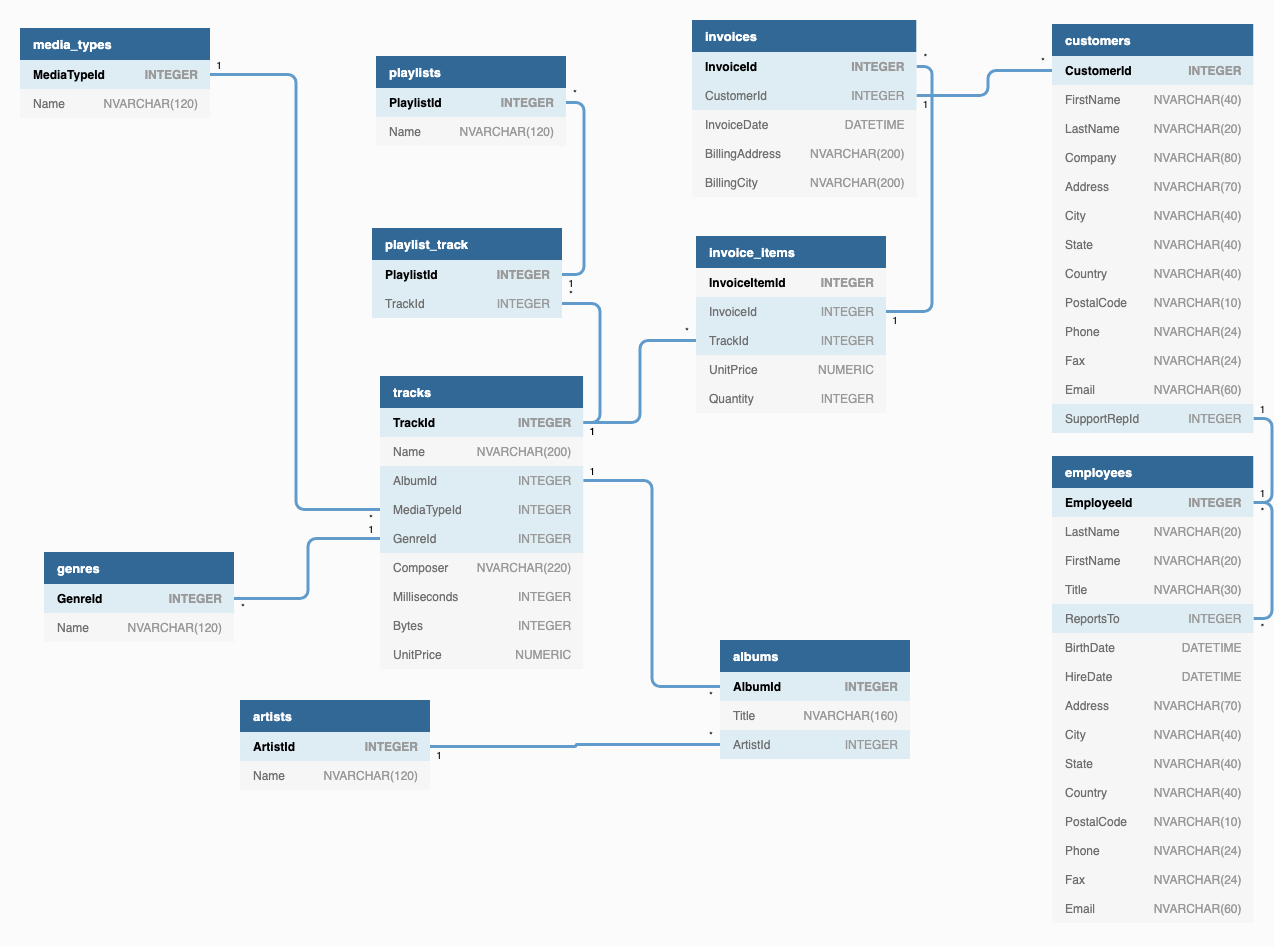


### Connect to the Database

In [3]:
# Connect to the Database
conn = sqlite3.connect(dbpath)
cur = conn.cursor()
print("Opened database successfully")

Opened database successfully


### Explore the tables

In [4]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())

[('albums',), ('sqlite_sequence',), ('artists',), ('customers',), ('employees',), ('genres',), ('invoices',), ('invoice_items',), ('media_types',), ('playlists',), ('playlist_track',), ('tracks',), ('sqlite_stat1',)]


In [5]:
cur.execute("SELECT COUNT(*) FROM artists;")
print(cur.fetchall())

[(275,)]


In [6]:
cur.execute("SELECT * FROM sqlite_sequence;")
print(cur.fetchall())

[('genres', 25), ('media_types', 5), ('artists', 275), ('albums', 347), ('tracks', 3503), ('employees', 8), ('customers', 59), ('invoices', 412), ('invoice_items', 2240), ('playlists', 18)]


----

# SQL Queries [10 points each]
Write a function for each query below. The function should be parametrizable, which means that the SQL query string has to be modified for each query based on the function parameter.

Remember that in SQL, strings have to be enclosed in quotes. Your SQL strings should make sure to include quotes when needed.

Hint: use tripe quotes for your SQL statement. This will allow you to format them with linebreaks, and include single quotes for strings within the query, for example:

""" SELECT * <br> FROM person <br> WHERE position='Manager'"""

Make sure to return the results in the required format.

---

## Query 1
Write a function `getEmployeePhone(cur,lastname)` which returns the result of a SQL query that returns the phone number of an employee given their last name. (If there are more than one employee with the same name, return the phone number of the first one.)
The function should return the phone number as a string.


In [7]:
from A4sub import getEmployeePhone

#Q1
# def getEmployeePhone(cur: sqlite3.Cursor, lastname)-> str:
#     res = cur.execute("SELECT Phone FROM EMPLOYEES WHERE LastName=? OR LastName=?", (lastname, lastname))
#     s = ''
#     i = 0
#     for row in res:
#         if i == 0:
#             s += str(row[0])
#         i += 1
#     return s

# #getEmployeePhone(cur,'King')
# getEmployeePhone(cur, 'King')

```
sample result:

getEmployeePhone(cur,'King')

'+1 (403) 456-9986'
```

---

## Query 2
Write a function `getCustomersByState(cur,state)` which returns the result of a SQL query that returns the first name, last name, and company of all customers in a given state.
The function should return the phone number as a string.


In [8]:
from A4sub import getCustomersByState
from typing import List, Dict, Tuple
# def getCustomersByState(cur: sqlite3.Cursor, state:str)-> List:
#     res = cur.execute("SELECT FirstName, LastName, Company FROM CUSTOMERS WHERE State=? OR State=?", (state, state))
#     newlist = [i for i in res]
#     # for row in res:
#     #     print(row)
#     return newlist


getCustomersByState(cur,'CA')

[('Frank', 'Harris', 'Google Inc.'),
 ('Tim', 'Goyer', 'Apple Inc.'),
 ('Dan', 'Miller', None)]

```
sample result:

getCustomersByState(cur,'CA')

[('Frank', 'Harris', 'Google Inc.'),
 ('Tim', 'Goyer', 'Apple Inc.'),
 ('Dan', 'Miller', None)]
 ```

---

## Query 3
Write a function `getTracksByLength(cur,state)` which returns the result of a SQL query that lists the name of the tracks that are less than `length` milliseconds, in alphabetical order.


In [9]:
from A4sub import getTracksByLength

def getTracksByLength(cur: sqlite3.Cursor, length:int)-> List:
    res = cur.execute("SELECT Name FROM tracks WHERE Milliseconds < ? OR Milliseconds < ? order by Name asc;", (length, length))
    newlist = [i for i in res]
    return newlist
getTracksByLength(cur,10000)

[('A Statistic',),
 ('Commercial 1',),
 ('Now Sports',),
 ('Oprah',),
 ('É Uma Partida De Futebol',)]

```
sample result:

getTracksByLength(cur,10000)

[('A Statistic',),
 ('Commercial 1',),
 ('Now Sports',),
 ('Oprah',),
 ('É Uma Partida De Futebol',)]
 ```

---

## Query 4
Write a function `getInvoiceByCountry(cur,country)` which returns the result of a SQL query that lists all invoices numbers and dates of customers from a given country.


In [10]:
from A4sub import getInvoiceByCountry

def getInvoiceByCountry(cur: sqlite3.Cursor, country:str)-> List:
    res = cur.execute("SELECT I.invoiceid, I.InvoiceDate FROM customers C JOIN invoices I ON C.CustomerId = I.CustomerID WHERE C.Country = ? or C.Country = ?;", (country, country))
    newlist = [i for i in res]
    return newlist



getInvoiceByCountry(cur,'Belgium')

[(3, '2009-01-03 00:00:00'),
 (55, '2009-08-24 00:00:00'),
 (176, '2011-02-15 00:00:00'),
 (187, '2011-03-28 00:00:00'),
 (242, '2011-11-26 00:00:00'),
 (371, '2013-07-02 00:00:00'),
 (394, '2013-10-04 00:00:00')]

```
sample result:

getInvoiceByCountry(cur,'Belgium')

[(3, '2009-01-03 00:00:00'),
 (55, '2009-08-24 00:00:00'),
 (176, '2011-02-15 00:00:00'),
 (187, '2011-03-28 00:00:00'),
 (242, '2011-11-26 00:00:00'),
 (371, '2013-07-02 00:00:00'),
 (394, '2013-10-04 00:00:00')]
 ```

---

## Query 5
Write a function `numInvoicesPerCountry(cur)` which returns the result of a SQL query that counts the number of invoices per country.


In [11]:
from A4sub import numInvoicesPerCountry


def numInvoicesPerCountry(cur: sqlite3.Cursor)-> List:
    res = cur.execute("SELECT Country, COUNT(*) FROM customers C JOIN invoices I ON C.CustomerId = I.CustomerID GROUP BY Country;")
    newlist = [i for i in res]
    return newlist

numInvoicesPerCountry(cur)

[('Argentina', 7),
 ('Australia', 7),
 ('Austria', 7),
 ('Belgium', 7),
 ('Brazil', 35),
 ('Canada', 56),
 ('Chile', 7),
 ('Czech Republic', 14),
 ('Denmark', 7),
 ('Finland', 7),
 ('France', 35),
 ('Germany', 28),
 ('Hungary', 7),
 ('India', 13),
 ('Ireland', 7),
 ('Italy', 7),
 ('Netherlands', 7),
 ('Norway', 7),
 ('Poland', 7),
 ('Portugal', 14),
 ('Spain', 7),
 ('Sweden', 7),
 ('USA', 91),
 ('United Kingdom', 21)]

```
sample output

numInvoicesPerCountry(cur)

[('Argentina', 7),
 ('Australia', 7),
 ('Austria', 7),
 ('Belgium', 7),
 ('Brazil', 35),
 ('Canada', 56),
 ('Chile', 7),
 ('Czech Republic', 14),
 ('Denmark', 7),
 ('Finland', 7),
 ('France', 35),
 ('Germany', 28),
 ('Hungary', 7),
 ('India', 13),
 ('Ireland', 7),
 ('Italy', 7),
 ('Netherlands', 7),
 ('Norway', 7),
 ('Poland', 7),
 ('Portugal', 14),
 ('Spain', 7),
 ('Sweden', 7),
 ('USA', 91),
 ('United Kingdom', 21)]
```

---

## Query 6
Write a function `getTrackInfo(cur,trackname)` which returns the name of the track, the title of the album it came from, as well as the name of the artist for a given track.
If multiple tracks have the same name, all will be returned.


In [12]:
from A4sub import getTrackInfo

def getTrackInfo(cur: sqlite3.Cursor,  track:str)-> List:
    #res = cur.execute("SELECT t.Name, a.title FROM tracks t JOIN albums a ON t.AlbumId=a.AlbumId WHERE Name=? OR Name=?;", (track, track))
    res = cur.execute("SELECT t.Name, a.title, b.Name FROM tracks t JOIN albums a ON t.AlbumId=a.AlbumId JOIN artists b ON a.ArtistId=b.ArtistId WHERE t.Name=? OR t.Name=?;", (track, track))
    newlist = [i for i in res]
    return newlist
getTrackInfo(cur,'Midnight')

[('Midnight', 'Heart of the Night', 'Spyro Gyra'),
 ('Midnight', 'Surfing with the Alien (Remastered)', 'Joe Satriani'),
 ('Midnight', 'By The Way', 'Red Hot Chili Peppers')]

```
sample results

getTrackInfo(cur,'Midnight')

[('Midnight', 'Heart of the Night', 'Spyro Gyra'),
 ('Midnight', 'Surfing with the Alien (Remastered)', 'Joe Satriani'),
 ('Midnight', 'By The Way', 'Red Hot Chili Peppers')]
```

---

## Query 7
Write a function `mostPurchasedArtist(cur,year)` which returns the result of a SQL query that lists the top-10 most purchased  artists, for a given year. The output should be `(Artist,Count)`

In [13]:
from A4sub import mostPurchasedArtist

def mostPurchasedArtist(cur: sqlite3.Cursor, year:int)-> List:
    newlist = []
    return newlist
mostPurchasedArtist(cur,2010)

[]

```
sample output:

mostPurchasedArtist(cur,2010)

[('Iron Maiden', 35),
 ('U2', 27),
 ('Metallica', 23),
 ('Led Zeppelin', 22),
 ('Titãs', 13),
 ('Lost', 12),
 ('Deep Purple', 12),
 ('Creedence Clearwater Revival', 12),
 ('Kiss', 11),
 ('Green Day', 11)]

```

---

## Query 8
Write a function `getSupervisor(cur,lastname)` which returns the result of a SQL query that returns the last name of the direct supervisor of the employee with last name 'lastname'.


In [14]:
from A4sub import getSupervisor

def getSupervisor(cur: sqlite3.Cursor, lastname:str)-> str:
    res = cur.execute("SELECT f.LastName FROM EMPLOYEES e JOIN EMPLOYEES f ON e.ReportsTo=f.EmployeeId WHERE e.LastName=? OR e.LastName=?", (lastname, lastname))
    s = ''
    for row in res:
        s += row[0]
    return s


getSupervisor(cur,'King')

'Mitchell'

```
sample output

getSupervisor(cur,'King')

'Mitchell'

```

---

## Query 9
Write a function `getNumCustomers(cur)` which returns the result of a SQL query that lists the number of customers assigned to each employee. The output should be the employee's last name, first name, and number of customers.


In [15]:
from A4sub import getNumCustomers
def getNumCustomers(cur: sqlite3.Cursor)-> List:
    res = cur.execute("SELECT I.LastName, I.FirstName, COUNT(*) FROM customers C JOIN employees I ON C.SupportRepId = I.EmployeeId GROUP BY EmployeeId;")
    newlist = [i for i in res]
    return newlist
getNumCustomers(cur)

[('Peacock', 'Jane', 21), ('Park', 'Margaret', 20), ('Johnson', 'Steve', 18)]

```
sample output

getNumCustomers(cur)

[('Peacock', 'Jane', 21), ('Park', 'Margaret', 20), ('Johnson', 'Steve', 18)]

```

---

## Query 10
Write a function `getTopEmployeeByYear(cur,year)` which returns the result of a SQL query that finds the employee with the most sale that year (each customer is assigned an employee as a representative), and returns the employee's last name, first name, and total sale.


In [16]:
from A4sub import getTopEmployeeByYear
getTopEmployeeByYear(cur,2013)

```
sample outpput

getTopEmployeeByYear(cur,2013)

[('Park', 'Margaret', 168.3)]
```

---

### Testing
You can run the following test to check your code


In [17]:
import sys
sys.path.append('../../shared/Tests/')
import A4test
A4test.TestAssignment4()

Opened database successfully

----------------------------------------
Testing Query 1
getEmployeePhone(cur,'King')
Test passed.
getEmployeePhone(cur,'Mitchell')
Test passed.

----------------------------------------
Testing Query 2
getCustomersByState(cur,'CA')
Test passed.
getCustomersByState(cur,'NJ')
Test passed.

----------------------------------------
Testing Query 3
getTracksByLength(cur,10000)
Test passed.
getTracksByLength(cur,5000)
Test passed.

----------------------------------------
Testing Query 4
getInvoiceByCountry(cur,'Belgium')
Test passed.
getInvoiceByCountry(cur,'Austria')
Test passed.

----------------------------------------
Testing Query 5
numInvoicesPerCountry(cur)
Test passed.

----------------------------------------
Testing Query 6
getTrackInfo(cur,'Midnight')
Test passed.
getTrackInfo(cur,'Bad')
Test passed.

----------------------------------------
Testing Query 7
mostPurchasedArtist(cur,2010)
Test failed: Incorrect answer
 Expected: [('Iron Maiden', 35), 